In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
train_data = pd.read_csv("flight.csv")
hotel = pd.read_csv("hotel.csv")

In [3]:
train_data.head()

,account_id,order_id,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,route,hotel_id,visited_city,log_transaction
0,912aa410a02cd7e1bab414214a7005c0,5c6f39c690f23650d3cde28e5b51c908,566.0,M,trip,ECONOMY,885898.00,NO,1.0,33199710eb822fbcfd0dc793f4788d30,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'"
1,d64a90a618202a5e8b25d8539377f3ca,5cbef2b87f51c18bf399d11bfe495a46,607.0,M,trip,ECONOMY,2139751.25,NO,2.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Jakarta', 'Medan', 'Bali']'","'[555476.36, 2422826.84, 7398697.64, 7930866.8..."
2,1a42ac02bcb4a902973123323f84da55,38fc35a1e62384012a358ab1fbd5ad03,648.0,F,trip,ECONOMY,2695550.00,NO,1.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[7328957.45, 7027662.34, 1933360.88, 3461836...."
3,92cddd64d4be4dec6dfbcc0c50e902f4,c7f54cb748828b4413e02dea2758faf6,418.0,F,trip,ECONOMY,1146665.00,NO,1.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'[5243631.69, 2474344.48, 1146665.0]'"
4,bf637abc47ea93bad22264f4956d67f6,dec228e4d2b6023c9f1fe9cfe9c451bf,537.0,F,trip,ECONOMY,1131032.50,NO,1.0,6c483c0812c96f8ec43bb0ff76eaf716,CGK - DPS,None,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[9808972.98, 9628619.79, 6712680.0, 5034510.0..."


# Data Preprocessing

Untuk proses Data Preprocessing, kami fokus untuk mengubah kolom-kolom yang isinya bukan nilai numerik ke dalam bentuk numerik. Kami memilih metode One Hot Encoding untuk menambah variabel biner untuk setiap nilai yang unik. 

Kami juga memilih menghapus kolom-kolom yang tidak signifikan, yaitu kolom account_id, order_id, dan route. Kolom account_id dan order_id tidak mengandung makna yang bermanfaat, sedangkan kolom route isinya semua sama. Kami juga mengubah kolom 'member_duration_days' dan 'no_of_seats' menjadi integer sebab isi kolom tidak mungkin desimal.

In [4]:
#untuk mengubah isi kolom 'hotel_id' menjadi 0 atau 1, sebab nama hotel tidak penting
def cross_sell(t):
    if t == 'None':
        return 0
    else :
        return 1

In [5]:
train_data['hotel_id'] = train_data['hotel_id'].apply(cross_sell)
train_data = pd.get_dummies(train_data, columns=['gender', 'trip','service_class','airlines_name'])
train_data = train_data.drop(['route'], axis=1)
train_data = train_data.drop(['order_id'], axis=1)
train_data = train_data.drop(['account_id'], axis=1)

In [6]:
#untuk mengubah isi kolom 'is_tx_promo' menjadi 0 atau 1
def promo(t):
    if t == 'NO':
        return 0
    else :
        return 1

In [7]:
train_data['is_tx_promo'] = train_data['is_tx_promo'].apply(promo) #kolom 'is_tx_promo' tidak perlu One Hot Encoding, sebab isinya hanya yes atau no
train_data['no_of_seats'] = train_data['no_of_seats'].astype(int)
train_data['member_duration_days'] = train_data['member_duration_days'].astype(int)

In [8]:
import ast
#mengubah string menjadi array
def convertToArray(t):
    return ast.literal_eval(t[1:-1])

In [9]:
train_data['visited_city'] = train_data['visited_city'].apply(convertToArray)
train_data = pd.concat([train_data,pd.get_dummies(train_data['visited_city'].apply(pd.Series).stack()).sum(level=0)], axis=1) #menambah kolom baru untuk setiap kota unik dalam array-array di kolom 'visited_city'
train_data = train_data.drop(['visited_city'], axis=1)

In [10]:
train_data.head()

,member_duration_days,price,is_tx_promo,no_of_seats,hotel_id,log_transaction,gender_F,gender_M,gender_None,trip_round,trip_roundtrip,trip_trip,service_class_BUSINESS,service_class_ECONOMY,airlines_name_0a102015e48c1f68e121acc99fca9a05,airlines_name_33199710eb822fbcfd0dc793f4788d30,airlines_name_6872b49542519aea7ae146e23fab5c08,airlines_name_6c483c0812c96f8ec43bb0ff76eaf716,airlines_name_74c5549aa99d55280a896ea50068a211,airlines_name_9855a1d3de1c46526dde37c5d6fb758c,airlines_name_ad5bef60d81ea077018f4d50b813153a,airlines_name_e35de6a36d385711a660c72c0286154a,Aceh,Bali,Jakarta,Jogjakarta,Manado,Medan,Semarang,Surabaya
0,566,885898.00,0,1,0,"'[545203.03, 918492.11, 1774241.4, 885898.0]'",0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0
1,607,2139751.25,0,2,0,"'[555476.36, 2422826.84, 7398697.64, 7930866.8...",0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,648,2695550.00,0,1,0,"'[7328957.45, 7027662.34, 1933360.88, 3461836....",1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0
3,418,1146665.00,0,1,0,"'[5243631.69, 2474344.48, 1146665.0]'",1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
4,537,1131032.50,0,1,0,"'[9808972.98, 9628619.79, 6712680.0, 5034510.0...",1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0


In [11]:
train_data.describe()

,member_duration_days,price,is_tx_promo,no_of_seats,hotel_id,gender_F,gender_M,gender_None,trip_round,trip_roundtrip,trip_trip,service_class_BUSINESS,service_class_ECONOMY,airlines_name_0a102015e48c1f68e121acc99fca9a05,airlines_name_33199710eb822fbcfd0dc793f4788d30,airlines_name_6872b49542519aea7ae146e23fab5c08,airlines_name_6c483c0812c96f8ec43bb0ff76eaf716,airlines_name_74c5549aa99d55280a896ea50068a211,airlines_name_9855a1d3de1c46526dde37c5d6fb758c,airlines_name_ad5bef60d81ea077018f4d50b813153a,airlines_name_e35de6a36d385711a660c72c0286154a,Aceh,Bali,Jakarta,Jogjakarta,Manado,Medan,Semarang,Surabaya
count,117946.000000,1.179460e+05,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.0,117946.0,117946.000000,117946.000000,117946.0,117946.000000,117946.000000
mean,955.586955,2.672772e+06,0.426678,1.688595,0.057213,0.482305,0.517491,0.000203,0.042240,0.117138,0.840622,0.002382,0.997618,0.177437,0.259780,0.000017,0.310897,0.091152,0.000051,0.100809,0.059858,0.056577,1.0,1.0,0.198489,0.024808,1.0,0.213021,0.056577
std,565.292428,2.449247e+06,0.494597,1.133721,0.232249,0.499689,0.499696,0.014263,0.201136,0.321586,0.366030,0.048752,0.048752,0.382040,0.438516,0.004118,0.462862,0.287826,0.007132,0.301077,0.237224,0.231033,0.0,0.0,0.398864,0.155540,0.0,0.409444,0.231033
min,329.000000,4.069520e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000
25%,537.000000,1.282710e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000
50%,678.000000,1.987061e+06,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000
75%,1341.000000,2.974400e+06,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000
max,2720.000000,5.903643e+07,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000


# Exploratory Data Analysis

Untuk Data Analysis, kami mencoba untuk memvisualisasikan hubungan antara tiap kolom dalam train_data dengan kolom 'hotel_id'. Dengan melakukan hal tersebut, kami mempunyai ide kasar akan fitur-fitur apa saja yang benar-benar mempengaruhi nilai kolom 'hotel_id'. Kami menggunakan library seaborn untuk plotting data dari train_data.

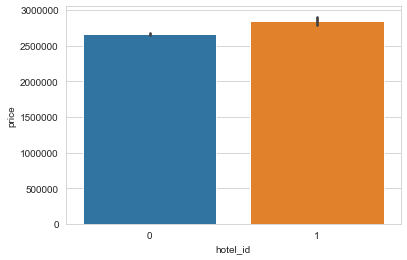

In [12]:
sns.set_style('whitegrid')
sns.barplot(x = 'hotel_id', y = 'price', data = train_data)

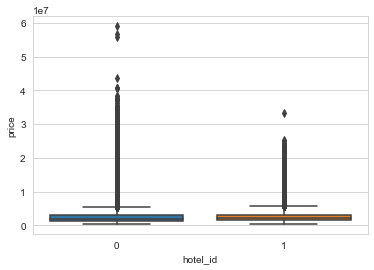

In [13]:
sns.boxplot(x = 'hotel_id', y = 'price', data = train_data)

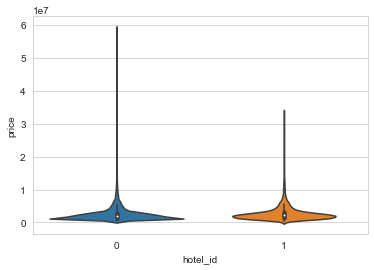

In [14]:
sns.violinplot(x = 'hotel_id', y = 'price', data = train_data)

Terlihat bahwa baris-baris data yang nilai kolom 'hotel_id' sama dengan 1 memiliki rata-rata 'price' yang sedikit lebih tinggi. 

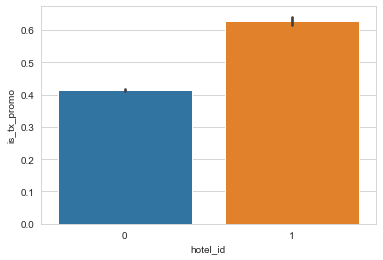

In [15]:
sns.barplot(x = 'hotel_id', y = 'is_tx_promo', data = train_data)

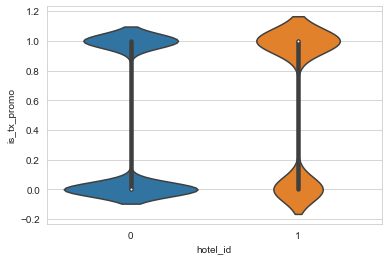

In [16]:
sns.violinplot(x = 'hotel_id', y = 'is_tx_promo', data = train_data)

Pemesanan yang merupakan promo memiliki kecenderungan untuk memesan hotel juga.

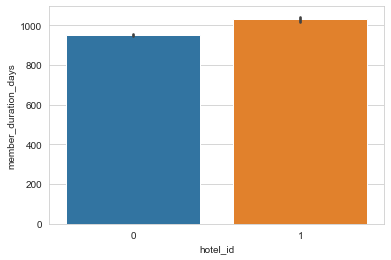

In [17]:
sns.barplot(x = 'hotel_id', y = 'member_duration_days', data = train_data)

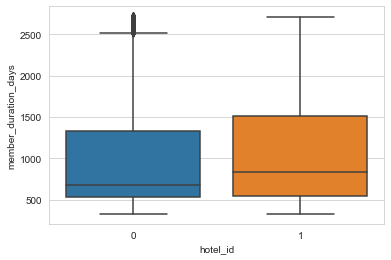

In [18]:
sns.boxplot(x = 'hotel_id', y = 'member_duration_days', data = train_data)

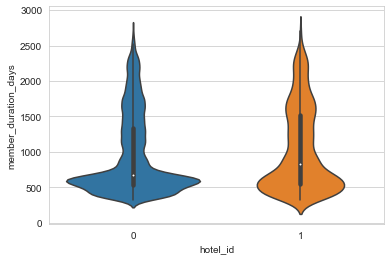

In [19]:
sns.violinplot(x = 'hotel_id', y = 'member_duration_days', data = train_data)

Pemesanan dimana terjadi cross-sell memiliki rata-rata 'member_duration_days' yang sedikit lebih tinggi

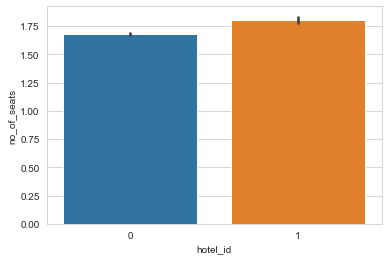

In [20]:
sns.barplot(x = 'hotel_id', y = 'no_of_seats', data = train_data)

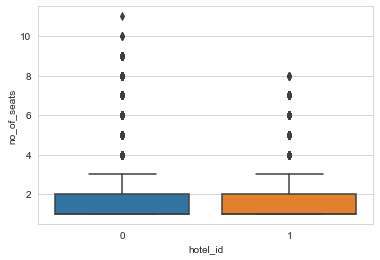

In [21]:
sns.boxplot(x = 'hotel_id', y = 'no_of_seats', data = train_data)

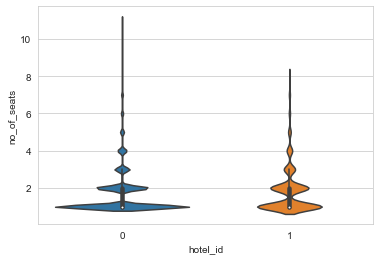

In [22]:
sns.violinplot(x = 'hotel_id', y = 'no_of_seats', data = train_data)

Pemesanan dimana terjadi cross-sell memiliki rata-rata 'no_of_seats' yang sedikit lebih tinggi

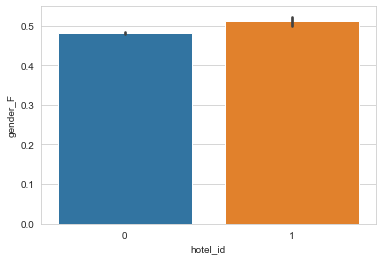

In [23]:
sns.barplot(x = 'hotel_id', y = 'gender_F', data = train_data)

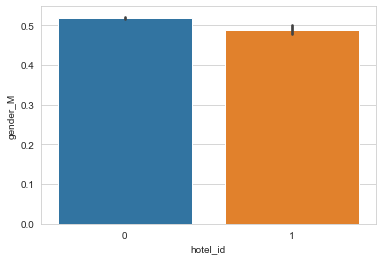

In [24]:
sns.barplot(x = 'hotel_id', y = 'gender_M', data = train_data)

Pemesanan yang dilakukan oleh seorang wanita lebih sering terjadi cross-sell dibanding dengan pria

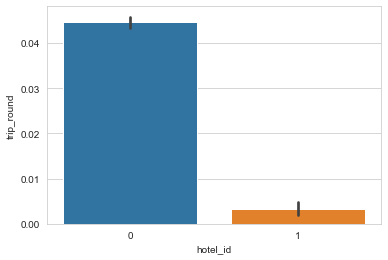

In [25]:
sns.barplot(x = 'hotel_id', y = 'trip_round', data = train_data)

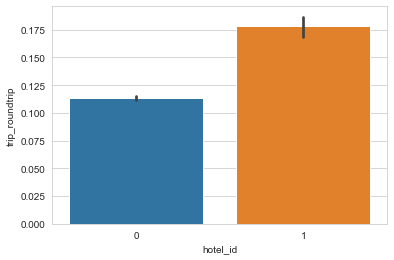

In [26]:
sns.barplot(x = 'hotel_id', y = 'trip_roundtrip', data = train_data)

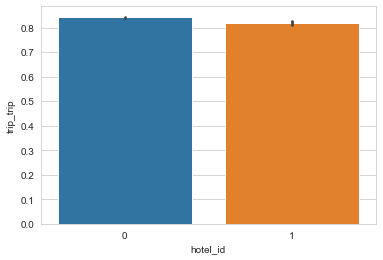

In [27]:
sns.barplot(x = 'hotel_id', y = 'trip_trip', data = train_data)

Terdapat perbedaan yang signifikan pada pemesanan dengan trip round, dimana lebih jarang terjadi cross-sell. Hal yang sebaliknya terlihat pada pemesanan dengan trip roundtrip. 

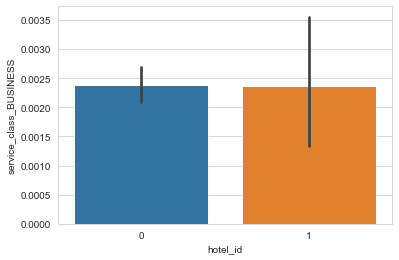

In [28]:
sns.barplot(x = 'hotel_id', y = 'service_class_BUSINESS', data = train_data)

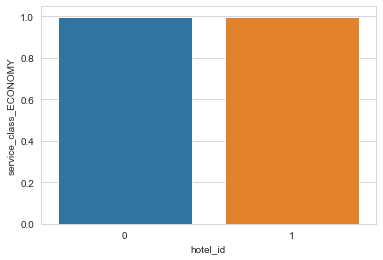

In [29]:
sns.barplot(x = 'hotel_id', y = 'service_class_ECONOMY', data = train_data)

Kolom 'service_class' terlihat tidak berpengaruh banyak terhadap status cross_sell dari suatu pemesanan.

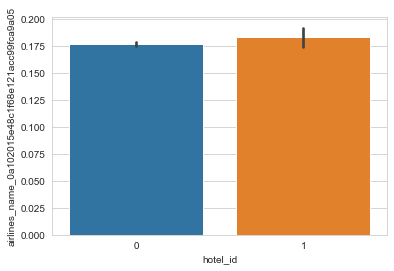

In [30]:
sns.barplot(x = 'hotel_id', y = 'airlines_name_0a102015e48c1f68e121acc99fca9a05', data = train_data)

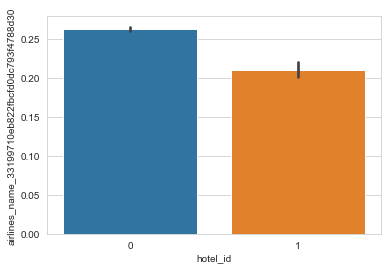

In [31]:
sns.barplot(x = 'hotel_id', y = 'airlines_name_33199710eb822fbcfd0dc793f4788d30', data = train_data)

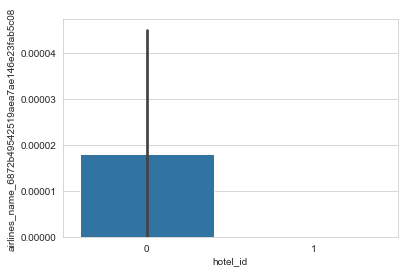

In [32]:
sns.barplot(x = 'hotel_id', y = 'airlines_name_6872b49542519aea7ae146e23fab5c08', data = train_data)

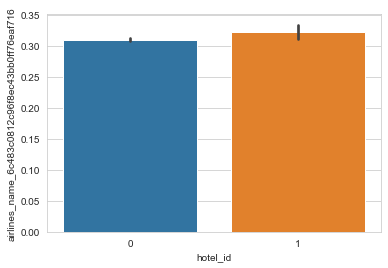

In [33]:
sns.barplot(x = 'hotel_id', y = 'airlines_name_6c483c0812c96f8ec43bb0ff76eaf716', data = train_data)

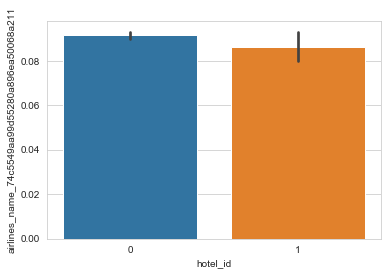

In [34]:
sns.barplot(x = 'hotel_id', y = 'airlines_name_74c5549aa99d55280a896ea50068a211', data = train_data)

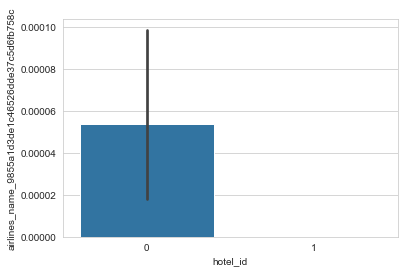

In [35]:
sns.barplot(x = 'hotel_id', y = 'airlines_name_9855a1d3de1c46526dde37c5d6fb758c', data = train_data)

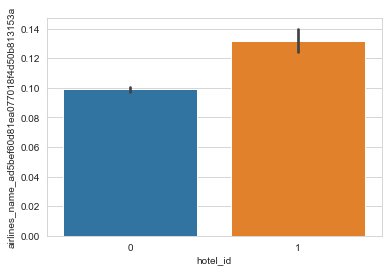

In [36]:
sns.barplot(x = 'hotel_id', y = 'airlines_name_ad5bef60d81ea077018f4d50b813153a', data = train_data)

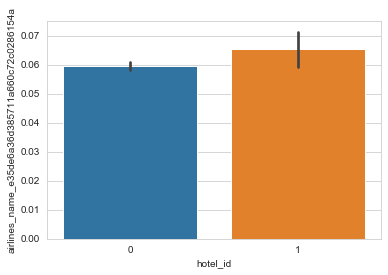

In [37]:
sns.barplot(x = 'hotel_id', y = 'airlines_name_e35de6a36d385711a660c72c0286154a', data = train_data)

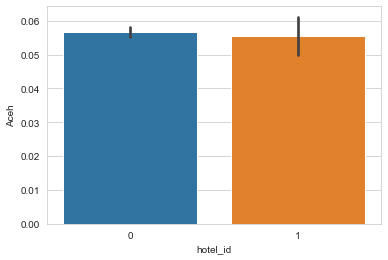

In [38]:
sns.barplot(x = 'hotel_id', y = 'Aceh', data = train_data)

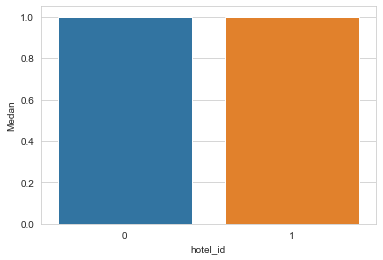

In [39]:
sns.barplot(x = 'hotel_id', y = 'Medan', data = train_data)

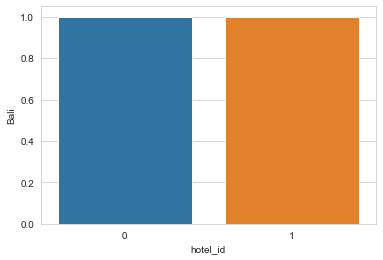

In [40]:
sns.barplot(x = 'hotel_id', y = 'Bali', data = train_data)

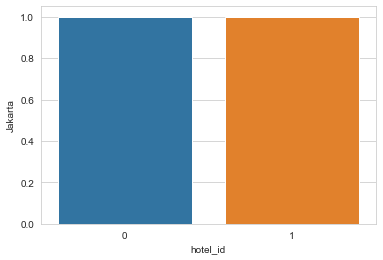

In [41]:
sns.barplot(x = 'hotel_id', y = 'Jakarta', data = train_data)

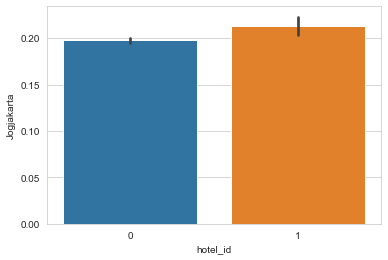

In [42]:
sns.barplot(x = 'hotel_id', y = 'Jogjakarta', data = train_data)

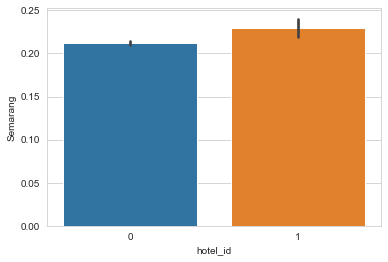

In [43]:
sns.barplot(x = 'hotel_id', y = 'Semarang', data = train_data)

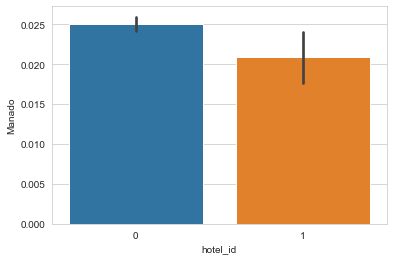

In [44]:
sns.barplot(x = 'hotel_id', y = 'Manado', data = train_data)

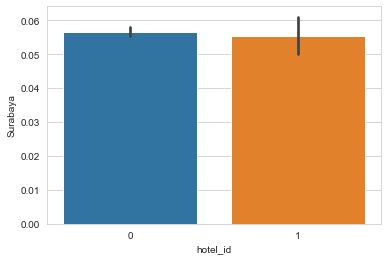

In [45]:
sns.barplot(x = 'hotel_id', y = 'Surabaya', data = train_data)

# Feature Engineering

Kami juga menambahkan beberapa kolom-kolom baru yang diderivasi dari kolom yang ada, dengan harapan kolom-kolom tersebut dapat menjadikan akurasi model lebih baik. Kolom 'log_transaction_total' adalah jumlah dari semua anggota array per baris di kolom 'log_transaction'. Kolom 'log_transaction_average' adalah rata-rata dari anggota array per baris di kolom 'log_transaction'. Kolom 'log_transaction_standard_deviation' adalah deviasi standar dari anggota array per baris di kolom 'log_transaction'. Kolom 'log_transaction_total_minus_price' adalah kolom 'log_transaction_total' dikurangi 'price', sebab nilai 'price' selalu ada dalam 'log_transaction'. Kolom 'price_per_seat' adalah hasil pembagian 'price' dengan 'no_of_seats'.

In [46]:
train_data['log_transaction'] = train_data['log_transaction'].apply(convertToArray)
train_data['log_transaction_total'] = train_data.apply(lambda row: sum(row.log_transaction), axis=1)
train_data['log_transaction_average'] = train_data.apply(lambda row: row.log_transaction_total/len(row.log_transaction),axis=1)
train_data['log_transaction_standard_deviation'] = train_data.apply(lambda row: np.std(row.log_transaction),axis=1)
train_data['log_transaction_total_minus_price'] = train_data.apply(lambda row: row.log_transaction_total-row.price, axis=1)
train_data = train_data.drop(['log_transaction'], axis=1)
train_data['price_per_seat'] = train_data.apply(lambda row: row.price/row.no_of_seats,axis=1)

Kolom-kolom dalam train_data memiliki range yang berbeda-beda. Ada yang range sampai ribuan, dan ada juga yang hanya ratusan. Supaya semua kolom dianggap sama rata nilainya ketika dimasukan ke dalam algoritma, perlu dilakukan standardisasi terhadap train_data. Semua kolom yang isinya ratusan dan ribuan standardisasi dengan StandardScaler sehingga mean nya menjadi 0 dan standard deviation nya menjadi 1.   

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
train_data['member_duration_days'] = scaler.fit_transform(train_data[['member_duration_days']])
train_data['price'] = scaler.fit_transform(train_data[['price']])
train_data['log_transaction_total'] = scaler.fit_transform(train_data[['log_transaction_total']])
train_data['log_transaction_average'] = scaler.fit_transform(train_data[['log_transaction_average']])
train_data['log_transaction_standard_deviation'] = scaler.fit_transform(train_data[['log_transaction_standard_deviation']])
train_data['log_transaction_total_minus_price'] = scaler.fit_transform(train_data[['log_transaction_total_minus_price']])
train_data['price_per_seat'] = scaler.fit_transform(train_data[['price_per_seat']])

D:\Users\Irvin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Users\Irvin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
train_data.head()

,member_duration_days,price,is_tx_promo,no_of_seats,hotel_id,gender_F,gender_M,gender_None,trip_round,trip_roundtrip,trip_trip,service_class_BUSINESS,service_class_ECONOMY,airlines_name_0a102015e48c1f68e121acc99fca9a05,airlines_name_33199710eb822fbcfd0dc793f4788d30,airlines_name_6872b49542519aea7ae146e23fab5c08,airlines_name_6c483c0812c96f8ec43bb0ff76eaf716,airlines_name_74c5549aa99d55280a896ea50068a211,airlines_name_9855a1d3de1c46526dde37c5d6fb758c,airlines_name_ad5bef60d81ea077018f4d50b813153a,airlines_name_e35de6a36d385711a660c72c0286154a,Aceh,Bali,Jakarta,Jogjakarta,Manado,Medan,Semarang,Surabaya,log_transaction_total,log_transaction_average,log_transaction_standard_deviation,log_transaction_total_minus_price,price_per_seat
0,-0.689181,-0.729564,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,-0.168758,-1.990060,-1.835998,-0.166782,-0.852389
1,-0.616652,-0.217627,0,2,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,3.011953,-0.916379,0.301294,3.012625,-0.637617
2,-0.544122,0.009300,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,-0.148450,0.308598,-0.066945,-0.148479,1.260164
3,-0.950993,-0.623095,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,-0.163504,-0.711350,-0.601871,-0.161817,-0.547975
4,-0.740482,-0.629478,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0.585717,0.224006,0.677944,0.587442,-0.566224


In [49]:
train_data.describe()

,member_duration_days,price,is_tx_promo,no_of_seats,hotel_id,gender_F,gender_M,gender_None,trip_round,trip_roundtrip,trip_trip,service_class_BUSINESS,service_class_ECONOMY,airlines_name_0a102015e48c1f68e121acc99fca9a05,airlines_name_33199710eb822fbcfd0dc793f4788d30,airlines_name_6872b49542519aea7ae146e23fab5c08,airlines_name_6c483c0812c96f8ec43bb0ff76eaf716,airlines_name_74c5549aa99d55280a896ea50068a211,airlines_name_9855a1d3de1c46526dde37c5d6fb758c,airlines_name_ad5bef60d81ea077018f4d50b813153a,airlines_name_e35de6a36d385711a660c72c0286154a,Aceh,Bali,Jakarta,Jogjakarta,Manado,Medan,Semarang,Surabaya,log_transaction_total,log_transaction_average,log_transaction_standard_deviation,log_transaction_total_minus_price,price_per_seat
count,1.179460e+05,1.179460e+05,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.0,117946.0,117946.000000,117946.000000,117946.0,117946.000000,117946.000000,1.179460e+05,1.179460e+05,1.179460e+05,1.179460e+05,1.179460e+05
mean,-1.107474e-16,2.047944e-16,0.426678,1.688595,0.057213,0.482305,0.517491,0.000203,0.042240,0.117138,0.840622,0.002382,0.997618,0.177437,0.259780,0.000017,0.310897,0.091152,0.000051,0.100809,0.059858,0.056577,1.0,1.0,0.198489,0.024808,1.0,0.213021,0.056577,-1.879066e-18,7.767659e-17,3.544306e-16,-5.464304e-17,2.825936e-16
std,1.000004e+00,1.000004e+00,0.494597,1.133721,0.232249,0.499689,0.499696,0.014263,0.201136,0.321586,0.366030,0.048752,0.048752,0.382040,0.438516,0.004118,0.462862,0.287826,0.007132,0.301077,0.237224,0.231033,0.0,0.0,0.398864,0.155540,0.0,0.409444,0.231033,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.108434e+00,-9.251128e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000,-1.724675e-01,-2.417835e+00,-2.282175e+00,-1.703706e-01,-1.546446e+00
25%,-7.404818e-01,-5.675492e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000,-1.596504e-01,-7.392389e-01,-6.212605e-01,-1.595117e-01,-6.757184e-01
50%,-4.910523e-01,-2.799692e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000,-1.514014e-01,-6.189331e-02,9.261958e-02,-1.513025e-01,-3.398366e-01
75%,6.817970e-01,1.231517e-01,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000,-1.417322e-01,6.319036e-01,6.165388e-01,-1.419129e-01,4.001884e-01
max,3.121253e+00,2.301275e+01,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.047962e+01,1.141390e+01,1.912167e+01,1.048073e+01,2.098515e+01


In [50]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler() 
# train_data['member_duration_days'] = scaler.fit_transform(train_data[['member_duration_days']])
# train_data['price'] = scaler.fit_transform(train_data[['price']])
# train_data['log_transaction_total'] = scaler.fit_transform(train_data[['log_transaction_total']])
# train_data['log_transaction_average'] = scaler.fit_transform(train_data[['log_transaction_average']])
# train_data['log_transaction_standard_deviation'] = scaler.fit_transform(train_data[['log_transaction_standard_deviation']])
# train_data['price_per_seat'] = scaler.fit_transform(train_data[['price_per_seat']])

# Modelling

Sebelum data dimasukan ke dalam algoritma ML, kita perlu memilih fitur-fitur yang benar-benar mempengaruhi kondisi cross-sell dari pemesanan. Bila fitur-fitur yang tidak berpengaruh dimasukan, maka dapat menambah noise sehingga akurasi nya berkurang. Oleh karena itu, kami mencari tahu terlebih dahulu korelasi kolom-kolom terhadap kolom 'hotel-id'. 

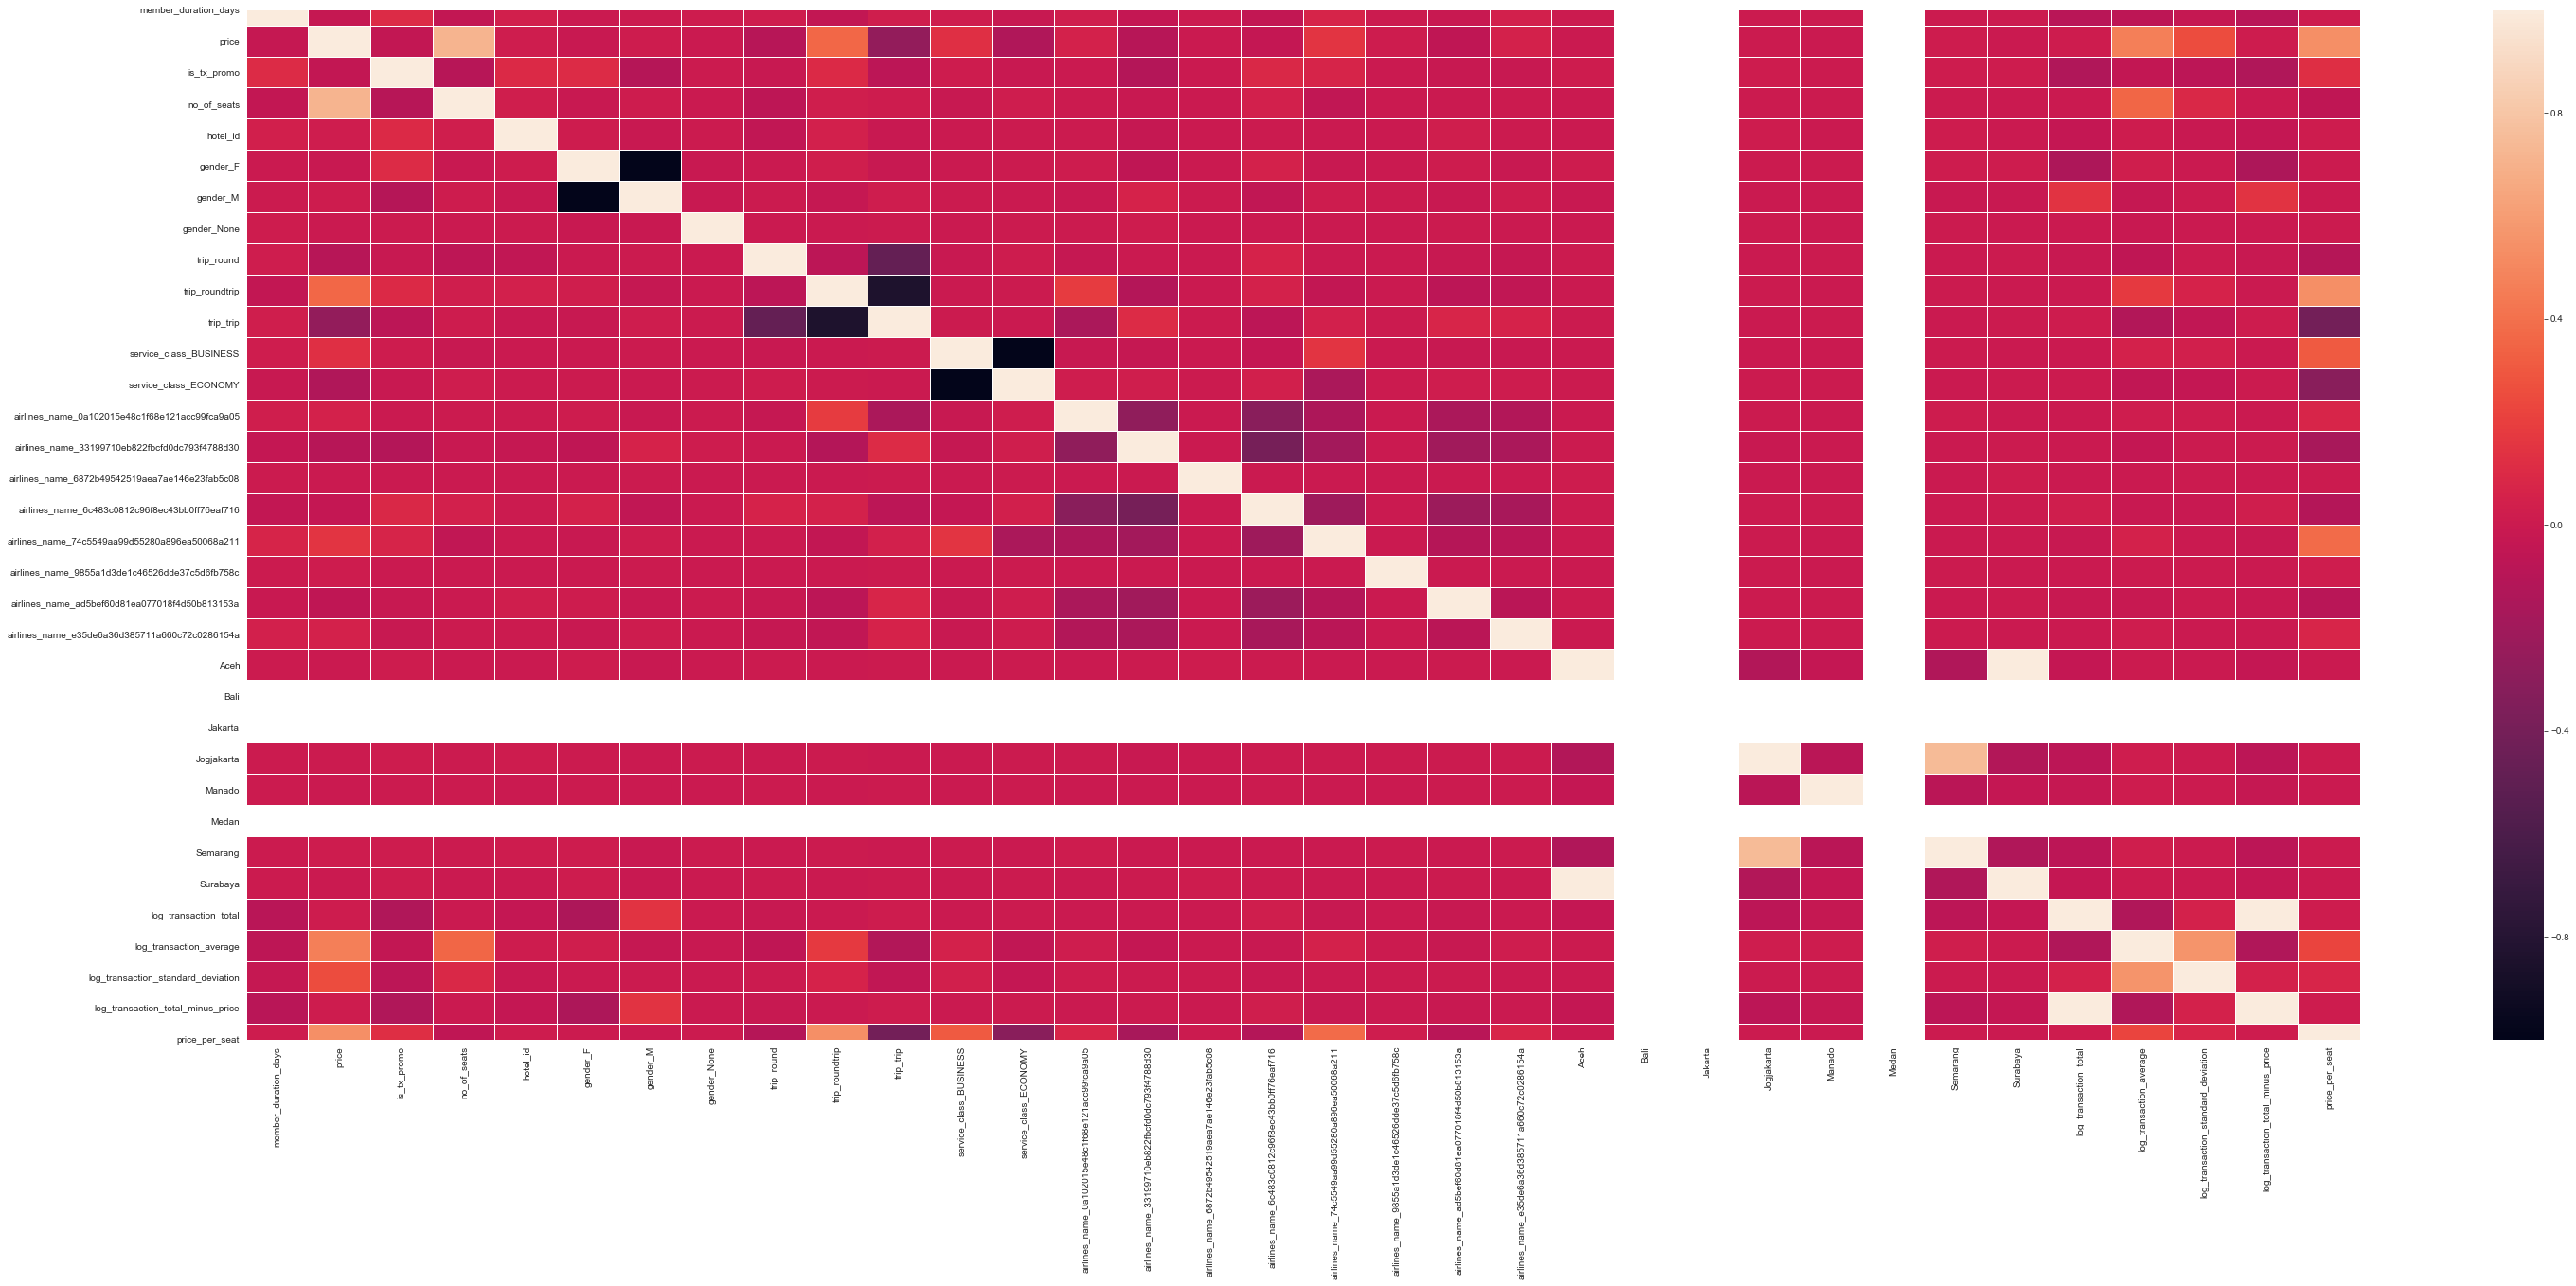

In [51]:
f, ax = plt.subplots(figsize = (50, 20))
sns.heatmap(train_data.iloc[:, 0:].corr(), annot = False, linewidths = 0.01, fmt = '.1f', ax = ax)
plt.show()

In [52]:
train_data

,member_duration_days,price,is_tx_promo,no_of_seats,hotel_id,gender_F,gender_M,gender_None,trip_round,trip_roundtrip,trip_trip,service_class_BUSINESS,service_class_ECONOMY,airlines_name_0a102015e48c1f68e121acc99fca9a05,airlines_name_33199710eb822fbcfd0dc793f4788d30,airlines_name_6872b49542519aea7ae146e23fab5c08,airlines_name_6c483c0812c96f8ec43bb0ff76eaf716,airlines_name_74c5549aa99d55280a896ea50068a211,airlines_name_9855a1d3de1c46526dde37c5d6fb758c,airlines_name_ad5bef60d81ea077018f4d50b813153a,airlines_name_e35de6a36d385711a660c72c0286154a,Aceh,Bali,Jakarta,Jogjakarta,Manado,Medan,Semarang,Surabaya,log_transaction_total,log_transaction_average,log_transaction_standard_deviation,log_transaction_total_minus_price,price_per_seat
0,-0.689181,-0.729564,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,-0.168758,-1.990060,-1.835998,-0.166782,-0.852389
1,-0.616652,-0.217627,0,2,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,3.011953,-0.916379,0.301294,3.012625,-0.637617
2,-0.544122,0.009300,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,-0.148450,0.308598,-0.066945,-0.148479,1.260164
3,-0.950993,-0.623095,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,-0.163504,-0.711350,-0.601871,-0.161817,-0.547975
4,-0.740482,-0.629478,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0.585717,0.224006,0.677944,0.587442,-0.566224
5,-0.818318,-0.496340,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,-0.155697,0.849237,0.399296,-0.154354,-0.185558
6,-0.984604,0.857599,1,4,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,-0.160293,-0.720906,-1.131644,-0.162625,-0.493523
7,2.413651,-0.686231,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,-0.143375,0.318554,0.580963,-0.141516,-0.728493
8,-0.595423,-0.598945,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,-0.136146,1.041095,0.519740,-0.134523,-0.478924
9,2.042161,-0.732255,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,-0.145502,0.662190,1.382577,-0.143518,-0.860083


In [53]:
y_train = train_data['hotel_id']
X_train = train_data.drop(['hotel_id'], axis=1)
X_train.apply(lambda x: x.corr(y_train))

member_duration_days                              0.032732
price                                             0.017619
is_tx_promo                                       0.100512
no_of_seats                                       0.025740
gender_F                                          0.013764
gender_M                                         -0.013810
gender_None                                       0.001605
trip_round                                       -0.047740
trip_roundtrip                                    0.046719
trip_trip                                        -0.014812
service_class_BUSINESS                           -0.000057
service_class_ECONOMY                             0.000057
airlines_name_0a102015e48c1f68e121acc99fca9a05    0.003694
airlines_name_33199710eb822fbcfd0dc793f4788d30   -0.027638
airlines_name_6872b49542519aea7ae146e23fab5c08   -0.001014
airlines_name_6c483c0812c96f8ec43bb0ff76eaf716    0.006315
airlines_name_74c5549aa99d55280a896ea50068a211   -0.0040

In [54]:
X_train = X_train.drop(['Bali', 'Jakarta', 'Medan'], axis=1) # Nilai konstan, sehingga dapat dihapus saja

Untuk mencari kolom-kolom yang paling relevan, kami menggunakan F-Score selection, yang menghitung variance antar fitur dan variance didalam setiap fitur. Lalu, kami memilih 10 fitur dengan F-Score paling tinggi, yang menunjukkan bahwa fitur-fitur tersebut lebih penting daripada fitur dengan F-Score rendah.

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=10)
selected_features = selector.fit_transform(X_train, y_train)

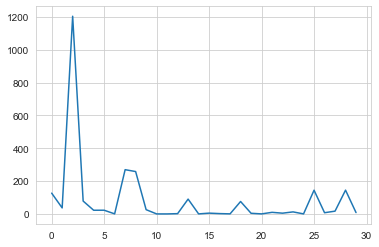

In [56]:
plt.plot(selector.scores_)

In [57]:
f_score_indexes = (-selector.scores_).argsort()[:10]
f_score_indexes

array([ 2,  7,  8, 28, 25,  0, 13,  3, 18,  1], dtype=int64)

In [58]:
X_train = X_train[X_train.columns[f_score_indexes]]

In [59]:
X_train.head()

,is_tx_promo,trip_round,trip_roundtrip,log_transaction_total_minus_price,log_transaction_total,member_duration_days,airlines_name_33199710eb822fbcfd0dc793f4788d30,no_of_seats,airlines_name_ad5bef60d81ea077018f4d50b813153a,price
0,0,0,0,-0.166782,-0.168758,-0.689181,1,1,0,-0.729564
1,0,0,0,3.012625,3.011953,-0.616652,0,2,0,-0.217627
2,0,0,0,-0.148479,-0.148450,-0.544122,0,1,0,0.009300
3,0,0,0,-0.161817,-0.163504,-0.950993,0,1,0,-0.623095
4,0,0,0,0.587442,0.585717,-0.740482,0,1,0,-0.629478


Semua yang kami aplikasikan ke train_data, kami aplikasikan juga ke test.

In [60]:
test = pd.read_csv('test.csv')

In [61]:
test = test.drop(['route'], axis=1)
test = pd.get_dummies(test, columns=['gender', 'trip','service_class','airlines_name'])
test['is_tx_promo'] = test['is_tx_promo'].apply(promo)
test['no_of_seats'] = test['no_of_seats'].astype(int)
test['member_duration_days'] = test['member_duration_days'].astype(int)
test = test.drop('order_id', axis=1)
test = test.drop(['account_id'], axis=1)
test['visited_city'] = test['visited_city'].apply(convertToArray)
test['visited_city_number'] = test.apply(lambda row: len(row.visited_city),axis=1)
test = pd.concat([test,pd.get_dummies(test['visited_city'].apply(pd.Series).stack()).sum(level=0)], axis=1)
test = test.drop(['visited_city'], axis=1)
test['log_transaction'] = test['log_transaction'].apply(convertToArray)
test['log_transaction_total'] = test.apply(lambda row: sum(row.log_transaction), axis=1)
test['log_transaction_average'] = test.apply(lambda row: row.log_transaction_total/len(row.log_transaction),axis=1)
test['log_transaction_standard_deviation'] = test.apply(lambda row: np.std(row.log_transaction),axis=1)
test['log_transaction_total_minus_price'] = test.apply(lambda row: row.log_transaction_total-row.price, axis=1)
test = test.drop(['log_transaction'], axis=1)
test['price_per_seat'] = test.apply(lambda row: row.price/row.no_of_seats,axis=1)

In [62]:
scaler = StandardScaler() 
test['member_duration_days'] = scaler.fit_transform(test[['member_duration_days']])
test['price'] = scaler.fit_transform(test[['price']])
test['log_transaction_total'] = scaler.fit_transform(test[['log_transaction_total']])
test['log_transaction_average'] = scaler.fit_transform(test[['log_transaction_average']])
test['log_transaction_standard_deviation'] = scaler.fit_transform(test[['log_transaction_standard_deviation']])
test['log_transaction_total_minus_price'] = scaler.fit_transform(test[['log_transaction_total_minus_price']])
test['price_per_seat'] = scaler.fit_transform(test[['price_per_seat']])

D:\Users\Irvin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Users\Irvin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [63]:
test['airlines_name_6872b49542519aea7ae146e23fab5c08'] = 0
test['airlines_name_9855a1d3de1c46526dde37c5d6fb758c'] = 0
test['gender_None'] = 0

In [64]:
test = test[X_train.columns]
test

,is_tx_promo,trip_round,trip_roundtrip,log_transaction_total_minus_price,log_transaction_total,member_duration_days,airlines_name_33199710eb822fbcfd0dc793f4788d30,no_of_seats,airlines_name_ad5bef60d81ea077018f4d50b813153a,price
0,1,0,0,-0.130813,-0.130211,1.398006,0,3,0,0.192331
1,0,0,0,-0.122696,-0.123362,0.218198,0,2,0,-0.215009
2,0,1,0,-0.128981,-0.130851,2.496813,0,1,1,-0.601581
3,1,0,0,-0.143234,-0.144138,-0.676344,1,2,0,-0.291134
4,1,0,0,-0.130416,-0.130012,-0.172724,0,1,0,0.128621
5,0,0,1,-0.122892,-0.121144,-0.729171,0,1,0,0.560709
6,1,0,0,-0.137918,-0.139279,-0.656974,0,1,0,-0.438399
7,0,0,0,-0.133825,-0.135157,-0.424534,1,2,0,-0.429127
8,1,0,0,-0.127061,-0.127177,-0.463274,0,1,0,-0.038126
9,1,0,0,-0.138448,-0.140318,0.234046,0,1,1,-0.601581


Lalu, kami mencoba untuk menggunakan beberapa classfier untuk menemukan model yang terbaik. Classifier yang kami coba adalah Gaussian Naive Bayes, K-Neighbors Classifier, Random Forest Classifier, Logistic Regression, Decision Tree Classifier, dan Neural Network

In [65]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [66]:
import tensorflow

# Validation

Kami mencari akurasi setiap model dengan menggunakan cross-validation, dimana training data dipecah-pecah menjadi bagian-bagian kecil, lalu setiap bagian kecil dicoba diprediksi hasilnya dengan model yang dibuat dari training data sisanya. 

In [67]:
nb_model = GaussianNB()
print('Naive Bayes', cross_val_score(nb_model, X_train, y_train, cv=10).mean())

knn_model = KNeighborsClassifier(n_neighbors=5)
print('KNN', cross_val_score(knn_model, X_train, y_train, cv=10).mean())

rfc_model = RandomForestClassifier(n_estimators=100, random_state=99)
print('Random Forest', cross_val_score(rfc_model, X_train, y_train, cv=10).mean())

lr_model = LogisticRegression(solver = 'saga')
print('Logistic Regression',cross_val_score(lr_model,X_train, y_train, cv=10).mean())

# SVM selalu ga selesai-selesai
# svc_model = SVC(gamma = 'auto')
# print('SVM',cross_val_score(svc_model,pca_train_data, y_train, cv=10).mean())

dtree_model = DecisionTreeClassifier()
print('Decision Tree',cross_val_score(dtree_model,X_train, y_train, cv=10).mean())

Naive Bayes 0.1363845164756886
KNN 0.940794978031205
Random Forest 0.9437539250531465
Logistic Regression 0.9427873793116364
Decision Tree 0.9011582236708847


Untuk neural network, kami memilih untuk membuat neural network dengan input layer berisi 10 nodes (karena kolom X_train ada 10), 1 hidden layer dengan 5 nodes, dan output layer 1 node. Activation function yang kami pilih adalah relu untuk input dan hidden layer, dan sigmoid untuk output layer. Output layer akan menghasilkan nilai antara 0 dan 1, lalu akan kami bulatkan menjadi 0 atau 1. Untuk mencegah overfitting, kami juga mengimplementasi dropout layer dengan peluang 50%, dan early stopping bila loss sudah tidak berkurang lagi.

In [68]:
model = keras.Sequential()

model.add(keras.layers.Dense(10, activation=tf.nn.relu, input_dim=X_train.shape[1]))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(5, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(X_train, y_train, epochs=10, callbacks=[es_callback])

Train on 117946 samples
Epoch 1/10
117946/117946 [==============================] - 12s 100us/sample - loss: 0.2883 - accuracy: 0.9300
Epoch 2/10
117946/117946 [==============================] - 11s 96us/sample - loss: 0.2194 - accuracy: 0.9428
Epoch 3/10
117946/117946 [==============================] - 11s 96us/sample - loss: 0.2144 - accuracy: 0.9428
Epoch 4/10
117946/117946 [==============================] - 11s 97us/sample - loss: 0.2140 - accuracy: 0.9428
Epoch 5/10
117946/117946 [==============================] - 11s 95us/sample - loss: 0.2136 - accuracy: 0.9428
Epoch 6/10
117946/117946 [==============================] - 11s 94us/sample - loss: 0.2136 - accuracy: 0.9428
Epoch 7/10
117946/117946 [==============================] - 11s 96us/sample - loss: 0.2138 - accuracy: 0.9428
Epoch 8/10
117946/117946 [==============================] - 11s 96us/sample - loss: 0.2138 - accuracy: 0.9428
Epoch 9/10
117946/117946 [==============================] - 11s 96us/sample - loss: 0.2138 - ac

Terlihat bahwa Random Forest Classifier memiliki akurasi yang paling tinggi. Oleh karena itu, kami memilih untuk fokus ke model Random Forest. Kami mencoba untuk membuat Random Forest Classifier kami sendiri untuk memprediksi data test nya. 

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data
train_list = train_data.values.tolist()
train_list

In [ ]:
ztrain_data.columns

Index(['is_tx_promo', 'trip_round', 'trip_roundtrip',
       'log_transaction_total_minus_price', 'log_transaction_total',
       'member_duration_days',
       'airlines_name_33199710eb822fbcfd0dc793f4788d30', 'no_of_seats',
       'airlines_name_ad5bef60d81ea077018f4d50b813153a', 'price', 'hotel_id'],
      dtype='object')

In [ ]:
header = train_data.columns

In [ ]:
def unique_vals(rows, col):
    return set([row[col] for row in rows])

In [ ]:
unique_vals(train_list, 10)

{0.0, 1.0}

In [ ]:
def class_counts(rows):
    counts = {}  # deklarasi label ke count
    for row in rows:
        # label adalah kolom terakhir
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [ ]:
class_counts(train_list)

{0.0: 111198, 1.0: 6748}

In [ ]:
def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

In [ ]:
class Question:

    def __init__(self, column, value): #digunakan untuk merecord column number dan value yang di tentukan user
        self.column = column
        self.value = value

    def match(self, example):
        # menentukan ketika value adalah numerik dan ketika fitur tidak berupa numerik
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [ ]:
q = Question(0, 1)
q

Is is_tx_promo >= 1?

In [ ]:
example = train_list[0]
q.match(example)

False

In [ ]:
def partition(rows, question):
    #function partition menerima 2 input yaitu row list dan pertanyaan
    #function akan menganalisa benar atau tidak dan akan di klasifikasikan ke masing-masing row
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [ ]:
true_rows, false_rows = partition(train_list, Question(10,1))
true_rows

[[0.0,
  0.0,
  0.0,
  -0.14049199443891652,
  -0.14133431339523037,
  -0.11425454439234771,
  0.0,
  2.0,
  0.0,
  -0.3116931402114009,
  1.0],
 [1.0,
  0.0,
  0.0,
  -0.1481120503826797,
  -0.14801108304183916,
  1.3911673663757675,
  0.0,
  1.0,
  0.0,
  0.035727349732416265,
  1.0],
 [1.0,
  0.0,
  1.0,
  -0.16368238935594304,
  -0.16420472919593873,
  -0.5671194200170686,
  0.0,
  1.0,
  0.0,
  -0.19404628115396133,
  1.0],
 [0.0,
  0.0,
  0.0,
  -0.11456271880931498,
  -0.11447258120182399,
  1.1399688806776802,
  0.0,
  2.0,
  0.0,
  0.032070291943533974,
  1.0],
 [1.0,
  0.0,
  0.0,
  -0.13788698802382335,
  -0.1393339980010586,
  2.211984953445574,
  0.0,
  1.0,
  0.0,
  -0.534428659881439,
  1.0],
 [1.0,
  0.0,
  1.0,
  -0.14168270000741184,
  -0.14223447668370412,
  1.028521665191909,
  0.0,
  1.0,
  0.0,
  -0.20467244906882684,
  1.0],
 [0.0,
  0.0,
  0.0,
  -0.15961827687152316,
  -0.1605042852917335,
  -0.9049990733152002,
  0.0,
  2.0,
  0.0,
  -0.3279773975354805,
  1.0

In [ ]:
false_rows

[[0.0,
  0.0,
  0.0,
  -0.16678243727972,
  -0.16875836878650283,
  -0.6891806560252942,
  1.0,
  1.0,
  0.0,
  -0.7295637434089692,
  0.0],
 [0.0,
  0.0,
  0.0,
  3.0126245995673737,
  3.011952797517828,
  -0.6166515157885225,
  0.0,
  2.0,
  0.0,
  -0.21762740378321643,
  0.0],
 [0.0,
  0.0,
  0.0,
  -0.14847937371417963,
  -0.14845013435383358,
  -0.5441223755517508,
  0.0,
  1.0,
  0.0,
  0.009299932125965027,
  0.0],
 [0.0,
  0.0,
  0.0,
  -0.16181701152217848,
  -0.16350406480541743,
  -0.950993162245836,
  0.0,
  1.0,
  0.0,
  -0.6230950609892454,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.5874415552478959,
  0.5857170192921277,
  -0.7404817552171571,
  0.0,
  1.0,
  0.0,
  -0.6294776618472003,
  0.0],
 [0.0,
  0.0,
  0.0,
  -0.1543538298681383,
  -0.15569700441737716,
  -0.8183179057151561,
  0.0,
  1.0,
  1.0,
  -0.4963400580047782,
  0.0],
 [1.0,
  0.0,
  0.0,
  -0.16262522105963761,
  -0.16029287194810476,
  -0.9846042272336082,
  0.0,
  4.0,
  0.0,
  0.8575993369659428,
  0.0],
 [0.0

In [ ]:
def gini(rows): #function ini digunakan untuk menghitung impurity
    
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [ ]:
def info_gain(left, right, current_uncertainty):
    
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [ ]:
current_uncertainty = gini(train_list)
current_uncertainty

0.10787867705301206

In [ ]:
def find_best_split(rows):
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # banyak kolom 

    # disini kita akan melihat setiap value dari fitur tersebut kita akan menghasillan pertanyaan serta mempartisi data tersebut
    # kita akan membuang pertanyaan yang gagal menghasilkan pecahan
    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values: 

            question = Question(col, val)

            # splitting dataset
            true_rows, false_rows = partition(rows, question)

            # skip ketika datset tidak splittig
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue
                
            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [ ]:
class Leaf: #leaf memuat dicionary dari data yang berhasil di olah


    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [ ]:
class Decision_Node:

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [ ]:
def build_tree(rows):


    # disini kita akan mempartisi data dan memakai pertanyaan yang menghasilkan information dengan gain paling tinggi
    gain, question = find_best_split(rows)


    #ketika tidak ada lagi information gain, kita akan return leaf
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # memangggil tree kembali untuk menambahkan node
    true_branch = build_tree(true_rows)

    # false juga akan menjadi leaf ketika tidak ada lagi gain yang bisa di dapatkan
    false_branch = build_tree(false_rows)

    # ketika selesai maka akan terbentuk decision node 
    return Decision_Node(question, true_branch, false_branch)

In [ ]:
def print_tree(node, spacing=""):

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [ ]:
my_tree = build_tree(train_list) 

In [ ]:
print_tree(my_tree)

In [ ]:
def classify(row, node):

    # mencapai leaf
    if isinstance(node, Leaf):
        return node.predictions

    #menentukan untuk ke arah true atau false branch
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [ ]:
def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [ ]:
print_leaf(classify(train_list[0], my_tree))

In [ ]:
test.head()

In [ ]:
test['hotel_id'] = '?'
test.head()

In [ ]:
test_list = test.values.tolist()
for row in test_list:
    print ("Actual: %s. Predicted: %s" %
           (row[1], print_leaf(classify(row, my_tree))))

In [ ]:
a = pd.DataFrame()
for row in test_list:
    data = print_leaf(classify(row, my_tree))
    dframe = pd.DataFrame.from_dict(data, orient='index')
    a = a.append(dframe)
    a['index1'] = a.index
    
a

In [ ]:
a.loc[a[0] == '50%']

In [ ]:
a['index1'] == 1

In [ ]:
a.reset_index(drop=True, inplace=True)
a

In [ ]:
indexNames = a[(a[0] == '50%') & (a['index1'] == 1)].index
a.drop(indexNames , inplace=True)
a

In [ ]:
indexNames = a[(a[0] == '33%')].index
a.drop(indexNames , inplace=True)
a

In [ ]:
# y_pred = model.predict(test.values)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rfc_model = RandomForestClassifier(n_estimators=1000, random_state=99)
# rfc_model.fit(X_train, y_train)
# y_pred = rfc_model.predict(test)

In [ ]:
# y_pred.max()

In [ ]:
# print(y_pred)

In [ ]:
# y_pred = np.where(y_pred >= 0.5, 1, 0)

In [ ]:
# y_pred.mean()

In [ ]:
# dtree_model.fit(X_train, y_train)
# y_pred = dtree_model.predict(test)

In [ ]:
# y_pred.mean()

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['is_cross_sell'] = y_pred

In [ ]:
def change_to_yes_or_no(t):
    if t == 0:
        return 'no'
    else :
        return 'yes'

In [ ]:
submission['is_cross_sell'] = submission['is_cross_sell'].apply(change_to_yes_or_no)

In [ ]:
submission.to_csv('datavidia_submit.csv', index=False)